In [79]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
from PIL import Image
import os


In [72]:

def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.0f dB")
    plt.ylim(0, sr/2)  
    plt.show()

def wav_to_spectrogram(file_path):
    audio, sr = librosa.load(file_path, sr=2000)  

    FRAME_SIZE = 256  
    HOP_SIZE = 64

    S = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

    Y = np.abs(S) ** 2

    Y_log = librosa.power_to_db(Y)

    plot_spectrogram(Y_log, sr, HOP_SIZE, y_axis="log")

In [73]:
# Load the CSV file into a DataFrame
data = pd.read_csv('./train_labels.csv')

# Filter and sample 4 entries for RightWhale
right_whales = data[data['class'] == 'RightWhale'].sample(n=4)

# Filter and sample 4 entries for NoWhale
no_whales = data[data['class'] == 'NoWhale'].sample(n=4)

# Extract idx from the sampled data
right_whale_indices = right_whales['idx'].values
no_whale_indices = no_whales['idx'].values

In [74]:
print(right_whale_indices)
print(no_whale_indices)

[5612 3904 9905 1081]
[2570  502 5657 6663]


In [81]:
def combine_images_from_folder(folder_path, output_path):
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

    images = [Image.open(file) for file in image_files]
    images_per_row = 2
    row_widths = [sum(image.size[0] for image in images[i:i + images_per_row]) for i in range(0, len(images), images_per_row)]
    max_width = max(row_widths) if row_widths else 0
    row_heights = [max(image.size[1] for image in images[i:i + images_per_row]) for i in range(0, len(images), images_per_row)]
    total_height = sum(row_heights)

    combined_image = Image.new('RGB', (max_width, total_height))

    y_offset = 0
    for i in range(0, len(images), images_per_row):
        x_offset = 0
        for image in images[i:i + images_per_row]:
            combined_image.paste(image, (x_offset, y_offset))
            x_offset += image.size[0]
        y_offset += row_heights[i // images_per_row]

    combined_image.save(output_path)




In [ ]:
folder_path = './dataset-exploration/no_whale_indices' 
output_path = './dataset-exploration/no_whale.png'  
combine_images_from_folder(folder_path, output_path)

In [83]:
folder_path = './dataset-exploration/right_whale_indices/' 
output_path = './dataset-exploration/right_whale.png'  
combine_images_from_folder(folder_path, output_path)

/tmp/ipykernel_63881/1940674870.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequency', y='Class', data=class_counts, palette='pastel')


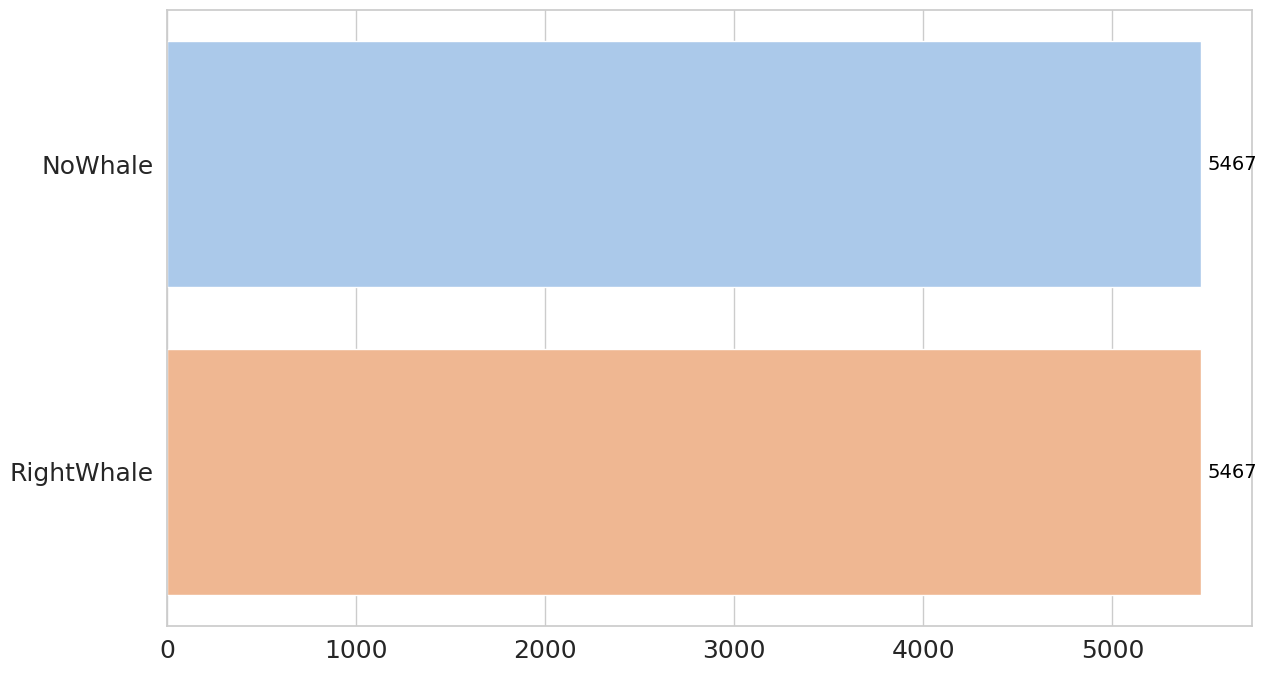

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/train.csv')
class_counts = df['class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Frequency']

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Frequency', y='Class', data=class_counts, palette='pastel')

ax.set_title('', fontsize=20)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}',
                (p.get_x() + width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=14, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.show()
